In [1]:
import ensaio
import pandas as pd

fname = ensaio.fetch_bushveld_gravity(version=1)
data = pd.read_csv(fname)
data

,longitude,latitude,height_sea_level_m,height_geometric_m,gravity_mgal,gravity_disturbance_mgal,gravity_bouguer_mgal
0,25.01500,-26.26334,1230.2,1257.474535,978681.38,25.081592,-113.259165
1,25.01932,-26.38713,1297.0,1324.574150,978669.02,24.538158,-122.662101
2,25.02499,-26.39667,1304.8,1332.401322,978669.28,26.526960,-121.339321
3,25.04500,-26.07668,1165.2,1192.107148,978681.08,17.954814,-113.817543
4,25.07668,-26.35001,1262.5,1289.971792,978665.19,12.700307,-130.460126
...,...,...,...,...,...,...,...
3872,31.51500,-23.86333,300.5,312.710241,978776.85,-4.783965,-39.543608
3873,31.52499,-23.30000,280.7,292.686630,978798.55,48.012766,16.602026
3874,31.54832,-23.19333,245.7,257.592670,978803.55,49.161771,22.456674
3875,31.57333,-23.84833,226.8,239.199065,978808.44,5.116904,-20.419870


In [2]:
 import pygmt

 # Needed so that displaying works on jupyter-sphinx and sphinx-gallery at
 # the same time. Using PYGMT_USE_EXTERNAL_DISPLAY="false" in the Makefile
 # for sphinx-gallery to work means that fig.show won't display anything here
 # either.
 pygmt.set_display(method="notebook")

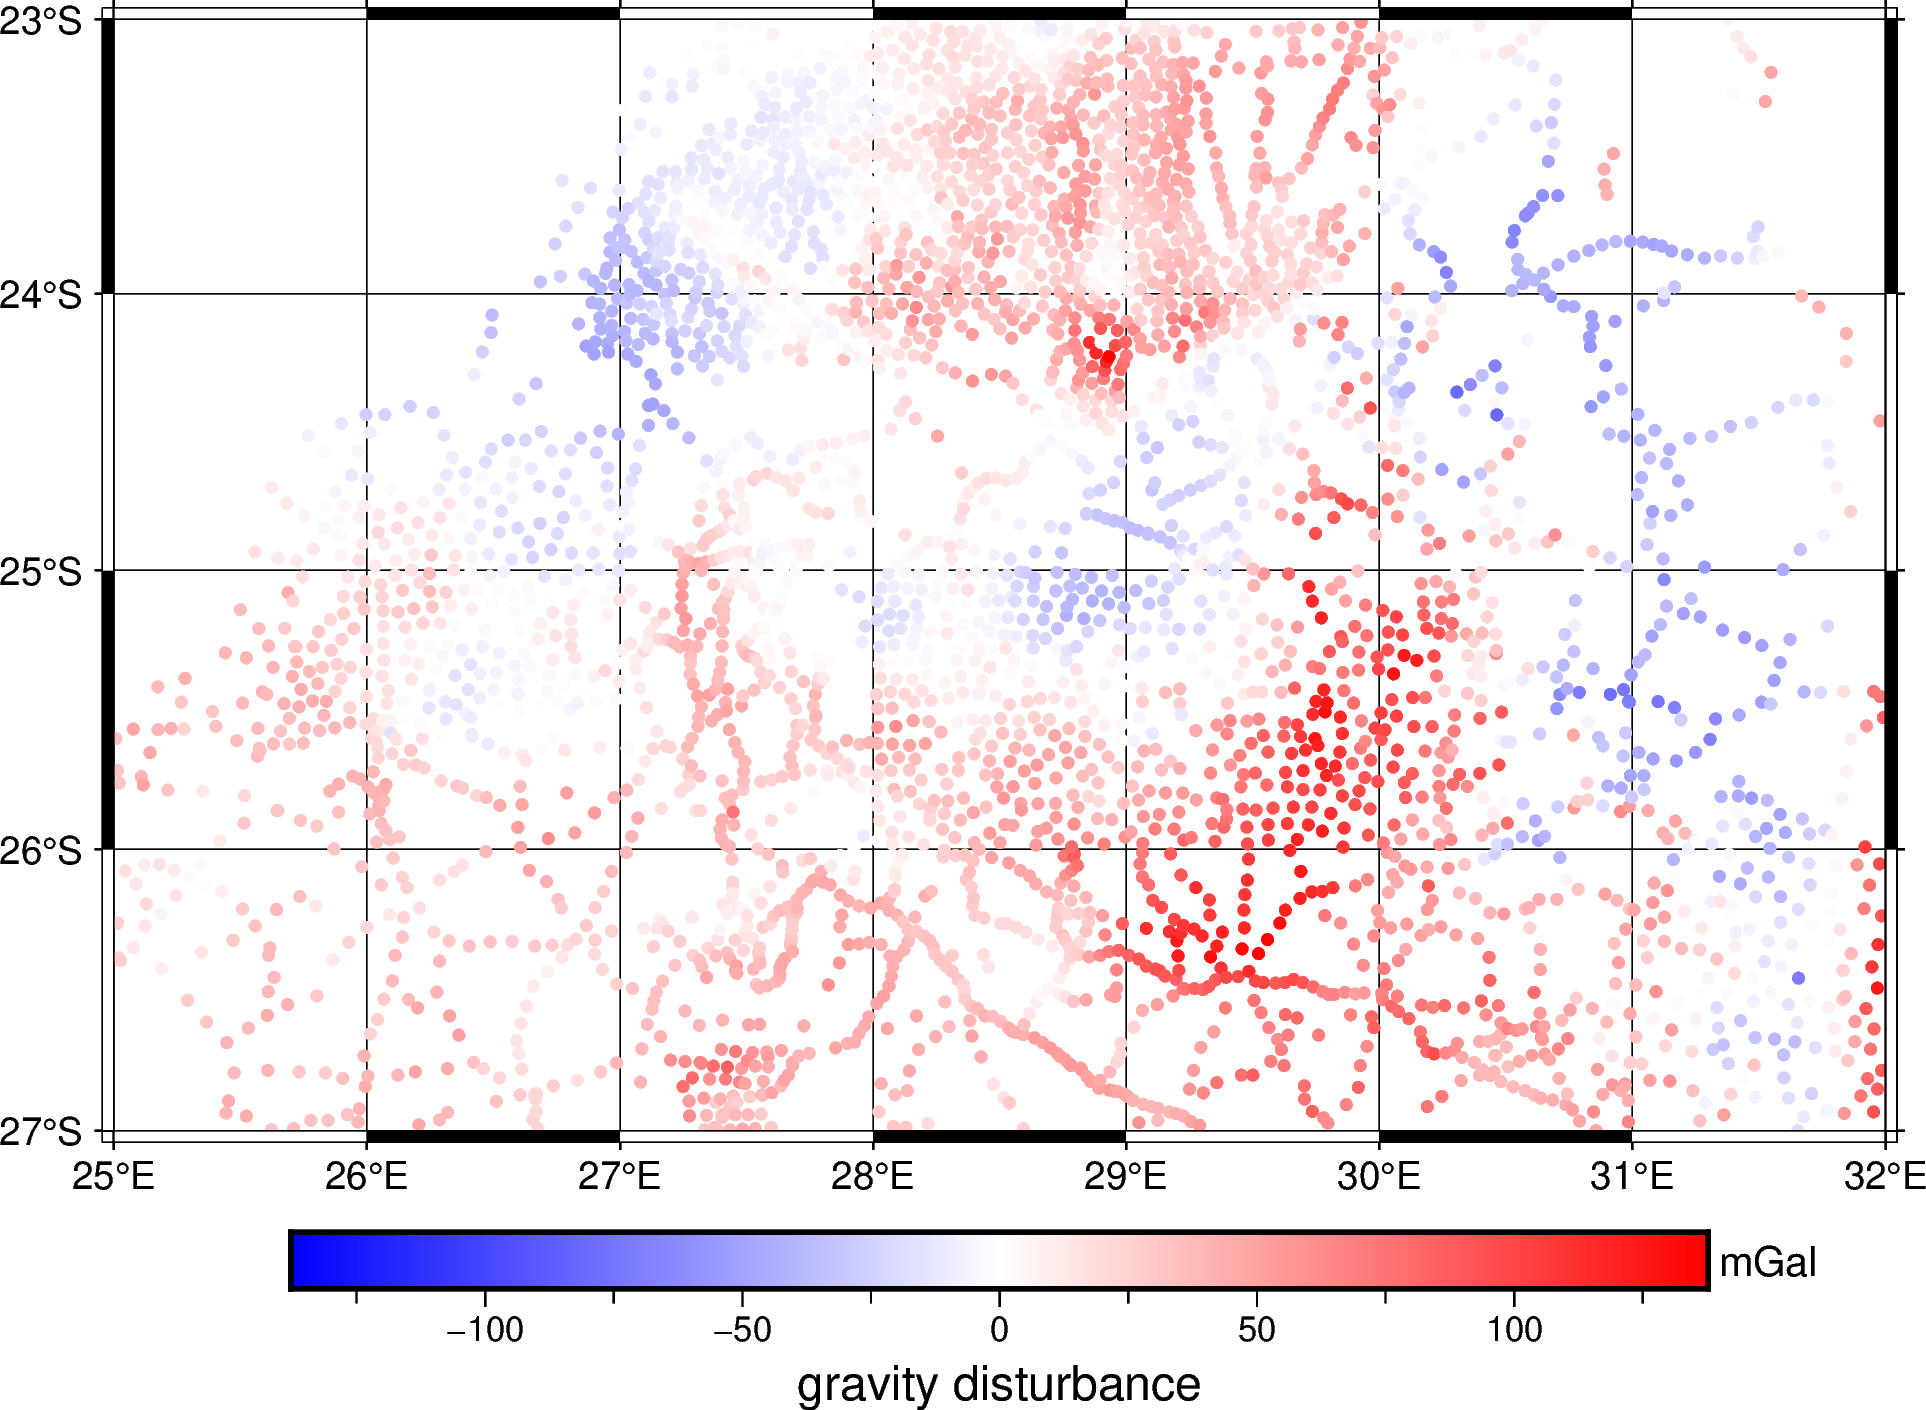

In [3]:
import pygmt
import verde as vd

maxabs = vd.maxabs(data.gravity_disturbance_mgal)

fig = pygmt.Figure()
pygmt.makecpt(cmap="polar+h0", series=[-maxabs, maxabs])
fig.plot(
   x=data.longitude,
   y=data.latitude,
   fill=data.gravity_disturbance_mgal,
   cmap=True,
   style="c3p",
   projection="M15c",
   frame=['ag', 'WSen'],
)
fig.colorbar(cmap=True, frame=["a50f25", "x+lgravity disturbance", "y+lmGal"])
fig.show()

In [4]:
import harmonica as hm

bouguer_correction = hm.bouguer_correction(data.height_geometric_m)

In [5]:
bouguer_disturbance = data.gravity_disturbance_mgal - bouguer_correction
bouguer_disturbance

0      -115.716267
1      -123.772762
2      -122.660359
3      -115.523941
4      -131.736230
           ...    
3872    -39.797741
3873     15.241009
3874     20.319441
3875    -21.665918
3876    -28.086345
Length: 3877, dtype: float64

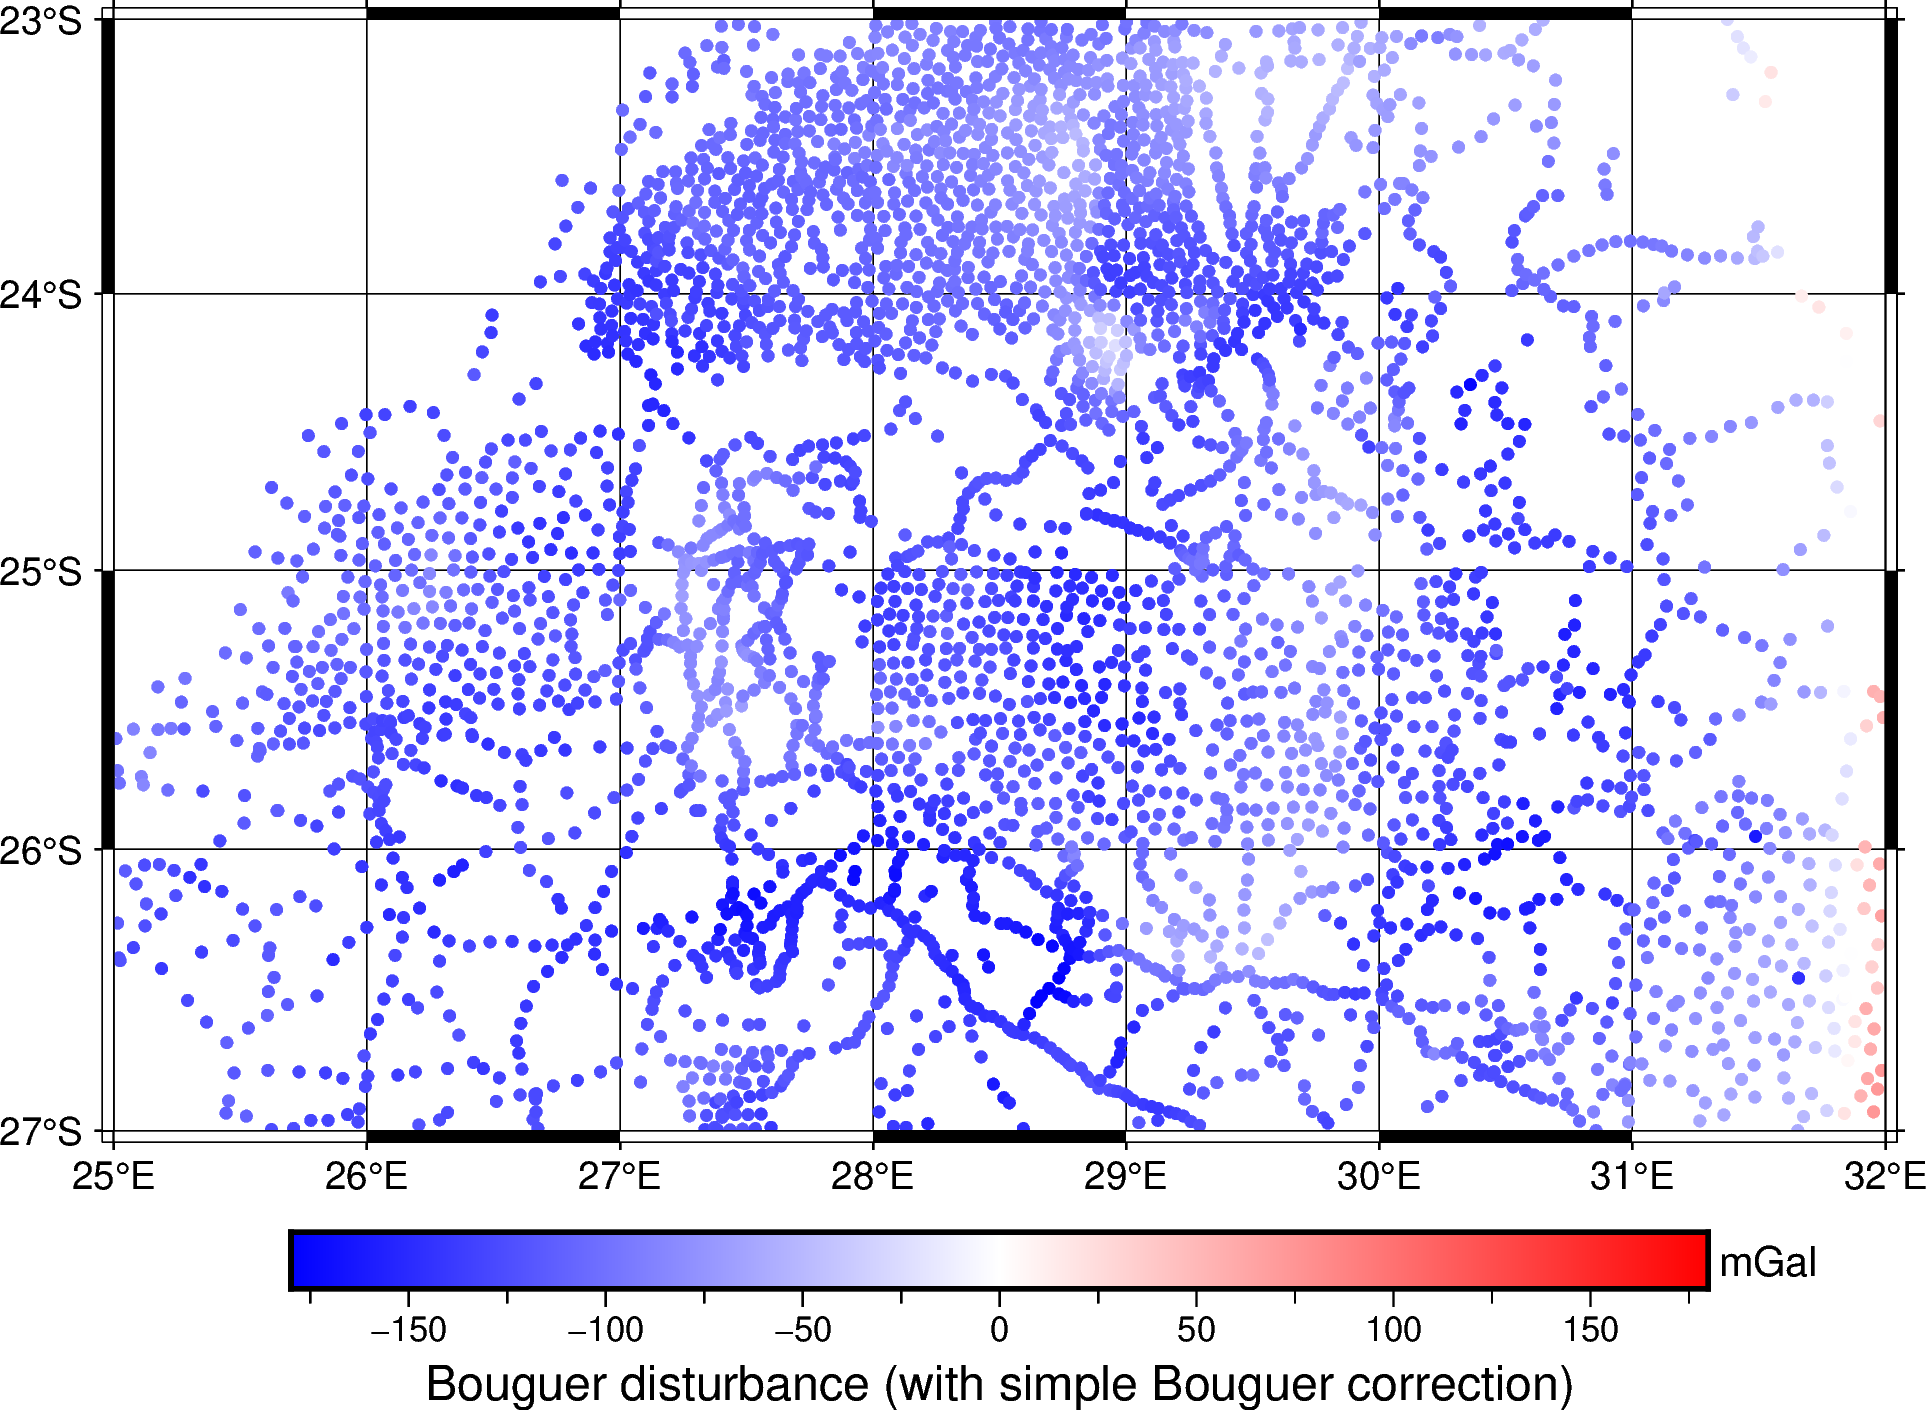

In [6]:
maxabs = vd.maxabs(bouguer_disturbance)

fig = pygmt.Figure()
pygmt.makecpt(cmap="polar+h0", series=[-maxabs, maxabs])
fig.plot(
   x=data.longitude,
   y=data.latitude,
   fill=bouguer_disturbance,
   cmap=True,
   style="c3p",
   projection="M15c",
   frame=['ag', 'WSen'],
)
fig.colorbar(cmap=True, frame=["a50f25", "x+lBouguer disturbance (with simple Bouguer correction)", "y+lmGal"])
fig.show()

In [7]:
import xarray as xr

fname = ensaio.fetch_southern_africa_topography(version=1)
topography = xr.load_dataarray(fname)
topography

<xarray.DataArray 'topography' (latitude: 1182, longitude: 1371)> Size: 13MB
array([[-5039., -5027., -5014., ..., -3846., -3867., -3873.],
       [-5036., -5021., -5007., ..., -3839., -3863., -3872.],
       [-5031., -5016., -5001., ..., -3835., -3860., -3870.],
       ...,
       [-2906., -2901., -2884., ...,   173.,   134.,   118.],
       [-2908., -2906., -2888., ...,   132.,   119.,   118.],
       [-2912., -2910., -2894., ...,   122.,   120.,   128.]],
      shape=(1182, 1371))
Coordinates:
  * latitude   (latitude) float64 9kB -36.0 -35.98 -35.97 ... -16.33 -16.32
  * longitude  (longitude) float64 11kB 10.92 10.93 10.95 ... 33.72 33.73 33.75
Attributes:
    Conventions:    CF-1.8
    title:          Topographic and bathymetric height for Southern Africa ob...
    crs:            WGS84
    source:         Downloaded from NOAA website (https://ngdc.noaa.gov/mgg/g...
    license:        public domain
    references:     https://doi.org/10.7289/V5C8276M
    long_name:      topographic height above mean sea level
    standard_name:  height_above_mean_sea_level
    description:    height topography/bathymetry referenced to mean sea level
    units:          m
    actual_range:   [-5685.  3376.]
    noaa_metadata:  Conventions: COARDS/CF-1.0\ntitle: ETOPO1_Ice_g_gmt4.grd\...

In [8]:
region = vd.get_region((data.longitude, data.latitude))
region_pad = vd.pad_region(region, pad=1)

topography = topography.sel(
    longitude=slice(region_pad[0], region_pad[1]),
    latitude=slice(region_pad[2], region_pad[3]),
)
topography

<xarray.DataArray 'topography' (latitude: 360, longitude: 539)> Size: 2MB
array([[ 1408.,  1403.,  1398., ..., -1300., -1316., -1336.],
       [ 1413.,  1406.,  1400., ..., -1292., -1305., -1319.],
       [ 1415.,  1409.,  1402., ..., -1284., -1295., -1306.],
       ...,
       [  970.,   972.,   973., ...,   121.,   120.,   122.],
       [  970.,   973.,   974., ...,   121.,   120.,   123.],
       [  967.,   970.,   974., ...,   122.,   122.,   123.]],
      shape=(360, 539))
Coordinates:
  * latitude   (latitude) float64 3kB -28.0 -27.98 -27.97 ... -22.03 -22.02
  * longitude  (longitude) float64 4kB 24.02 24.03 24.05 ... 32.95 32.97 32.98
Attributes:
    Conventions:    CF-1.8
    title:          Topographic and bathymetric height for Southern Africa ob...
    crs:            WGS84
    source:         Downloaded from NOAA website (https://ngdc.noaa.gov/mgg/g...
    license:        public domain
    references:     https://doi.org/10.7289/V5C8276M
    long_name:      topographic height above mean sea level
    standard_name:  height_above_mean_sea_level
    description:    height topography/bathymetry referenced to mean sea level
    units:          m
    actual_range:   [-5685.  3376.]
    noaa_metadata:  Conventions: COARDS/CF-1.0\ntitle: ETOPO1_Ice_g_gmt4.grd\...

In [9]:
import pyproj

projection = pyproj.Proj(proj="merc", lat_ts=topography.latitude.values.mean())

In [10]:
topography_proj = vd.project_grid(topography, projection, method="nearest")
topography_proj

<xarray.DataArray 'topography' (northing: 360, easting: 539)> Size: 2MB
array([[ 1408. ,  1403. ,  1396.5, ..., -1300. , -1316. , -1336. ],
       [ 1409.5,  1409.5,  1399. , ..., -1292. , -1305. , -1319. ],
       [ 1412. ,  1412. ,  1399.5, ..., -1276. , -1295. , -1306. ],
       ...,
       [  971. ,   971. ,   973. , ...,   122.5,   120. ,   122. ],
       [  970. ,   970. ,   974.5, ...,   122.5,   121. ,   123. ],
       [  970. ,   970. ,   974.5, ...,   122.5,   121. ,   123. ]],
      shape=(360, 539))
Coordinates:
  * northing  (northing) float64 3kB -2.928e+06 -2.926e+06 ... -2.265e+06
  * easting   (easting) float64 4kB 2.424e+06 2.426e+06 ... 3.328e+06 3.329e+06
Attributes:
    metadata:  Generated by Chain(steps=[('mean',\n              BlockReduce(...

In [11]:
import numpy as np

density = np.where(topography_proj >= 0, 2670, 1040 - 2670)

prisms = hm.prism_layer(
    (topography_proj.easting, topography_proj.northing),
    surface=topography_proj,
    reference=0,
    properties={"density": density},
)
prisms

<xarray.Dataset> Size: 5MB
Dimensions:   (northing: 360, easting: 539)
Coordinates:
  * northing  (northing) float64 3kB -2.928e+06 -2.926e+06 ... -2.265e+06
  * easting   (easting) float64 4kB 2.424e+06 2.426e+06 ... 3.328e+06 3.329e+06
    top       (northing, easting) float64 2MB 1.408e+03 1.403e+03 ... 123.0
    bottom    (northing, easting) float64 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Data variables:
    density   (northing, easting) int64 2MB 2670 2670 2670 ... 2670 2670 2670
Attributes:
    coords_units:      meters
    properties_units:  SI

In [12]:
# Project the coordinates of the observation points
easting, northing = projection(data.longitude.values, data.latitude.values)
coordinates = (easting, northing, data.height_geometric_m)

# Compute the terrain effect
terrain_effect = prisms.prism_layer.gravity(coordinates, field="g_z")

In [13]:
topo_free_disturbance = data.gravity_disturbance_mgal - terrain_effect

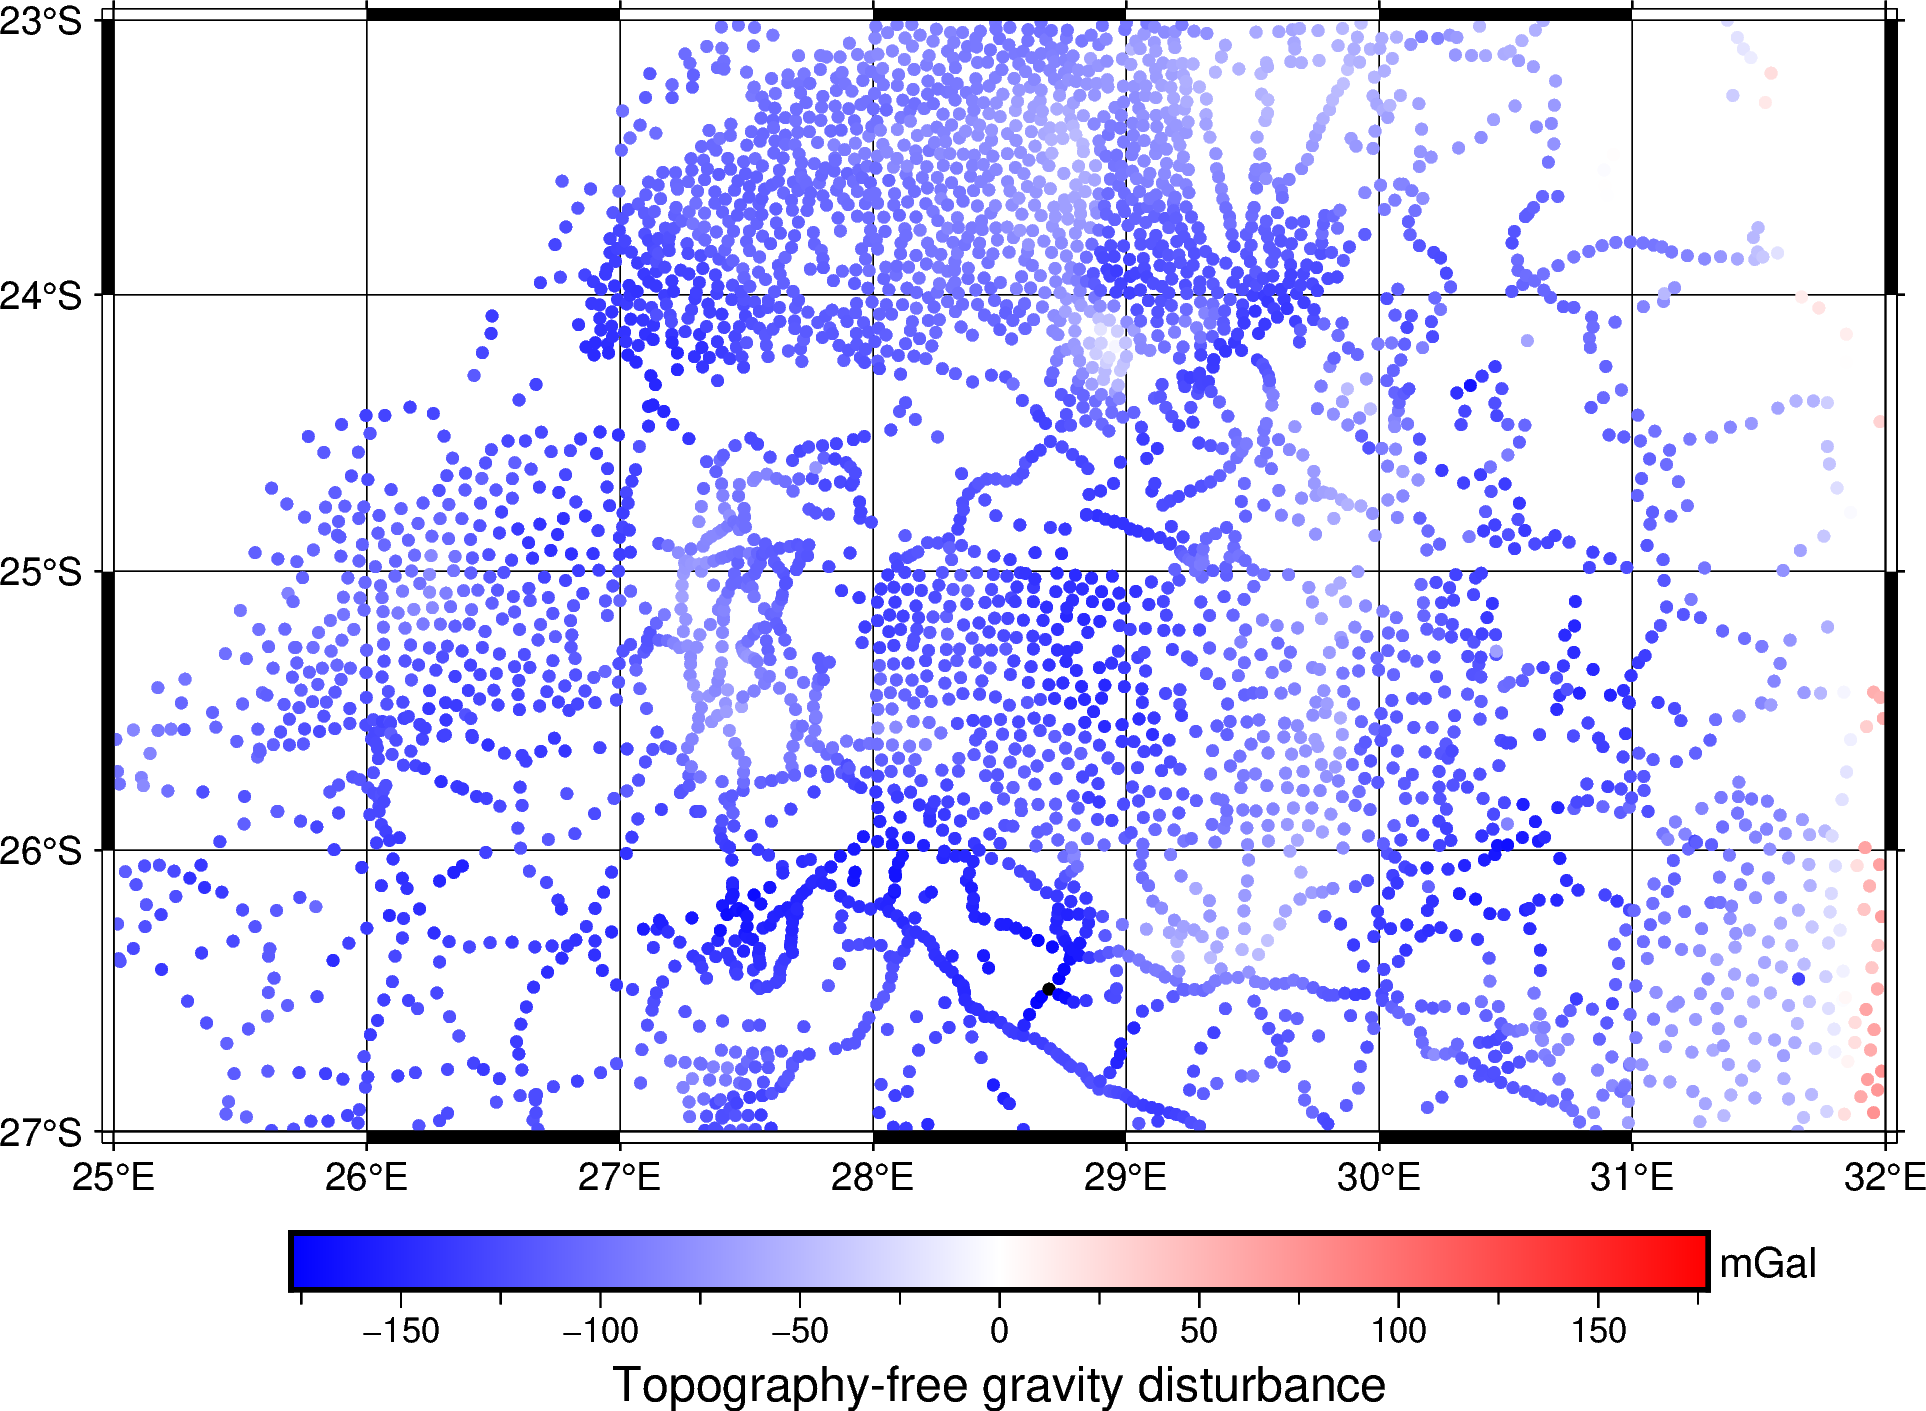

In [14]:
maxabs = vd.maxabs(topo_free_disturbance)

fig = pygmt.Figure()
pygmt.makecpt(cmap="polar+h0", series=[-maxabs, maxabs])
fig.plot(
   x=data.longitude,
   y=data.latitude,
   fill=topo_free_disturbance,
   cmap=True,
   style="c3p",
   projection="M15c",
   frame=['ag', 'WSen'],
)
fig.colorbar(cmap=True, frame=["a50f25", "x+lTopography-free gravity disturbance", "y+lmGal"])
fig.show()